# Box plots

Plus d'informations sur la campagne dans le README du dossier [courant](./).

## Imports nécessaires

In [1]:
from metrics.wallet import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from common import *

## Constantes locales

In [2]:
INSTANCE_SET = [
	'Bibd-sc-12-06-05_c18',
	'CarSequencing-85-02_c18',
	'ConsecutiveSquarePacking-sp-18-047',
	'CostasArray-16',
	'CoveringArray-elt-3-09-2-12',
	'Eternity-10-05_c18',
	'GracefulGraph-K05-P02_c18',
	'KnightTour-14-ext03',
	'NumberPartitioning-188',
	'Pb-robin12_c18',
	'QueenAttacking-07_X2',
	'Queens-0120-m1',
	'Rlfap-scen-11-f12_c18',
	'StripPacking-C1P3_c18',
	'Subisomorphism-g17-g42_c18',
	'frb-59-26-3-mgd_c18',
	'qwh-o30-h375-17',
]

MAP_NAME = {
    'activity': '$\mathtt{abs}$',
    'impact': '$\mathtt{ibs}$',
    'domddeg': '$\mathtt{dom/ddeg}$',
    'chs': '$\mathtt{dom/wdeg}^{\mathtt{chs}}$',
    'cacd': '$\mathtt{wdeg}^{\mathtt{ca.cd}}$',
}

## Analyse importée!

In [3]:
analysis = import_analysis_from_file(ANALYSIS_03)

## Vue globale de la distribution des temps cpu sur la sélection d'instances

In [4]:
# On ne garde que la campagne h1 > lex
analysis = analysis.filter_analysis(
    function=lambda x: x['input'] in INSTANCE_SET and ('deg' not in x['experiment_ware'] and 'rand' not in x['experiment_ware'] or x['experiment_ware'] == 'domddeg')
)

analysis.pivot_table(
    index='input', 
    columns='experiment_ware', 
    values='cpu_time'
)

experiment_ware                       activity        cacd         chs  \
input                                                                    
Bibd-sc-12-06-05_c18                2400.00000     6.04317    50.43660   
CarSequencing-85-02_c18             2400.00000  2116.39000    11.94500   
ConsecutiveSquarePacking-sp-18-047  2400.00000  1609.26000  2138.38000   
CostasArray-16                       219.60700    26.86050     9.93102   
CoveringArray-elt-3-09-2-12         2400.00000  2400.00000     6.58258   
Eternity-10-05_c18                   201.36000    49.02830    40.84850   
GracefulGraph-K05-P02_c18             27.52000    98.98870    23.44650   
KnightTour-14-ext03                  126.90000    10.17940  2400.00000   
NumberPartitioning-188               182.12900   398.26800  2400.00000   
Pb-robin12_c18                      2400.00000    98.12110   139.94400   
QueenAttacking-07_X2                2400.00000     9.10493    33.10410   
Queens-0120-m1                         6.21191     7.83782     6.02771   
Rlfap-scen-11-f12_c18               2400.00000     6.44702     6.45687   
StripPacking-C1P3_c18               2400.00000   155.60500    15.57120   
Subisomorphism-g17-g42_c18          2400.00000    62.47490    38.93500   
frb-59-26-3-mgd_c18                 2400.00000  2400.00000  2400.00000   
qwh-o30-h375-17                       47.05470    31.89720     5.90027   

experiment_ware                        domddeg     impact  
input                                                      
Bibd-sc-12-06-05_c18                2400.00000  2400.0000  
CarSequencing-85-02_c18             2400.00000  2400.0000  
ConsecutiveSquarePacking-sp-18-047  2400.00000  2400.0000  
CostasArray-16                         7.21448  2400.0000  
CoveringArray-elt-3-09-2-12         2400.00000    15.1666  
Eternity-10-05_c18                   230.46500  2400.0000  
GracefulGraph-K05-P02_c18              9.43634   333.3580  
KnightTour-14-ext03                 2400.00000  2400.0000  
NumberPartitioning-188              2400.00000  1705.1200  
Pb-robin12_c18                      2400.00000  2400.0000  
QueenAttacking-07_X2                2400.00000  2400.0000  
Queens-0120-m1                       586.78500  2400.0000  
Rlfap-scen-11-f12_c18               2400.00000  2400.0000  
StripPacking-C1P3_c18               2400.00000  2400.0000  
Subisomorphism-g17-g42_c18            87.45210  2400.0000  
frb-59-26-3-mgd_c18                 1982.18000  2400.0000  
qwh-o30-h375-17                      101.10400  2400.0000

## Box plot pour chaque instance intéressante

input experiment_ware    cpu_time  \
705    Bibd-sc-12-06-05_c18          impact  2400.00000   
3135   Bibd-sc-12-06-05_c18         domddeg  2400.00000   
8805   Bibd-sc-12-06-05_c18        activity  2400.00000   
10425  Bibd-sc-12-06-05_c18             chs    50.43660   
12045  Bibd-sc-12-06-05_c18            cacd     6.04317   

                                                    npts  \
705    [0.9900990099009901, 0.9994175888177053, 0.998...   
3135   [0.9935934769947583, 0.9836924868957484, 0.974...   
8805   [0.9877693651718114, 0.9353523587652883, 0.999...   
10425  [0.9900990099009901, 0.9854397204426325, 0.989...   
12045  [0.9900990099009901, 0.994175888177053, 0.9988...   

                                                     esb       status  \
705    [0.0881563254938522, 0.10040025959022056, 0.06...      UNKNOWN   
3135   [0.10476548826805623, 0.09388076221423221, 0.0...      UNKNOWN   
8805   [0.24926961001709932, 0.03393811591782103, 0.0...      UNKNOWN   
10425  [0.1606404153443529, 0.10630615721317471, 0.13...  SATISFIABLE   
12045  [0.1417415429508996, 0.40160103836088223, 2.74...  SATISFIABLE   

                                                    auvr exception  timeout  \
705    [0.9672066822066842, 0.9677894327894329, 0.934...      None   2400.0   
3135   [0.985757575757576, 0.9781973581973604, 0.9669...      None   2400.0   
8805   [0.9810178710178701, 0.8698445998445954, 0.906...      None   2400.0   
10425  [0.9805205905205895, 0.9762509712509694, 0.977...      None   2400.0   
12045  [0.9791647241647258, 0.9908158508158467, 0.993...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
705      False         False    False           True              True  False  
3135     False         False    False           True              True  False  
8805     False         False    False           True              True  False  
10425     True          True    False           True              True  False  
12045     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 13
npts


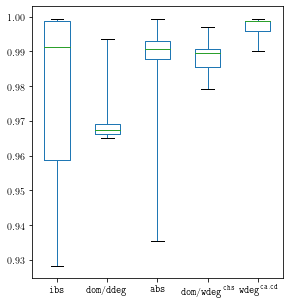

auvr


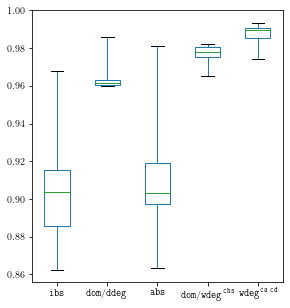

esb


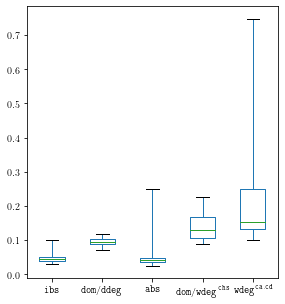

input experiment_ware  cpu_time  \
454    CarSequencing-85-02_c18          impact  2400.000   
2884   CarSequencing-85-02_c18         domddeg  2400.000   
8554   CarSequencing-85-02_c18        activity  2400.000   
10174  CarSequencing-85-02_c18             chs    11.945   
11794  CarSequencing-85-02_c18            cacd  2116.390   

                                                    npts  \
454    [0.6898505924781041, 0.7418856259659969, 0.796...   
2884   [0.9330242143225141, 0.9335394126738794, 0.933...   
8554   [0.7341576506955177, 0.7181865018031942, 0.667...   
10174  [0.6975785677485832, 0.9824832560535807, 0.957...   
11794  [0.6980937660999484, 0.9768160741885626, 0.952...   

                                                     esb       status  \
454    [0.009861962742832034, 0.0118117952459083, 0.0...      UNKNOWN   
2884   [0.05238274413402812, 0.05238274413402812, 0.0...      UNKNOWN   
8554   [0.00903602336311985, 0.009690105483238445, 0....      UNKNOWN   
10174  [0.01214927511007711, 0.010312152197569016, 0....  SATISFIABLE   
11794  [0.01145613104674466, 0.0675590531822045, 0.08...  SATISFIABLE   

                                                    auvr exception  timeout  \
454    [0.8747111111111134, 0.8684055555555508, 0.894...      None   2400.0   
2884   [0.8853611111111125, 0.8859499999999902, 0.885...      None   2400.0   
8554   [0.8246499999999994, 0.7818388888888935, 0.776...      None   2400.0   
10174  [0.889972222222222, 0.8763444444444369, 0.8458...      None   2400.0   
11794  [0.888216666666667, 0.9202555555555533, 0.9115...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
454      False         False    False           True              True  False  
2884     False         False    False           True              True  False  
8554     False         False    False           True              True  False  
10174     True          True    False           True              True  False  
11794     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 16
npts


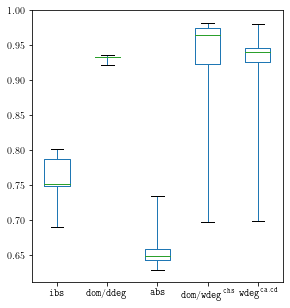

auvr


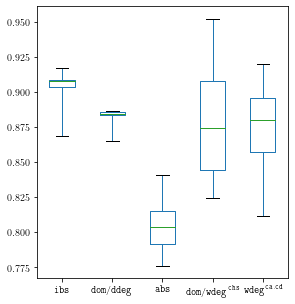

esb


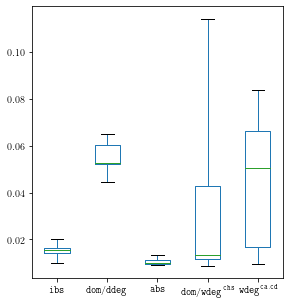

input experiment_ware  cpu_time  \
229    ConsecutiveSquarePacking-sp-18-047          impact   2400.00   
2659   ConsecutiveSquarePacking-sp-18-047         domddeg   2400.00   
8329   ConsecutiveSquarePacking-sp-18-047        activity   2400.00   
9949   ConsecutiveSquarePacking-sp-18-047             chs   2138.38   
11569  ConsecutiveSquarePacking-sp-18-047            cacd   1609.26   

                                                    npts  \
229    [0.4, 0.43157894736842106, 0.42105263157894735...   
2659   [0.8894736842105263, 0.5631578947368421, 0.6, ...   
8329   [0.8631578947368421, 0.7105263157894737, 0.6, ...   
9949   [0.5105263157894737, 0.8894736842105263, 0.857...   
11569  [0.5, 0.5526315789473685, 0.6263157894736842, ...   

                                                     esb       status  \
229    [0.0485155616811804, 0.04252246288526988, 0.06...      UNKNOWN   
2659   [0.07376345602546817, 0.0777292332311385, 0.09...      UNKNOWN   
8329   [0.10040025959022056, 0.0440781627469261, 0.05...      UNKNOWN   
9949   [0.0722881869049588, 0.09267716269866513, 0.06...  SATISFIABLE   
11569  [0.06884589229043696, 0.06571653354996256, 0.0...  SATISFIABLE   

                                                    auvr exception  timeout  \
229    [0.36203703703703793, 0.2844444444444422, 0.34...      None   2400.0   
2659   [0.6875925925925935, 0.503888888888888, 0.5324...      None   2400.0   
8329   [0.7914814814814812, 0.27055555555555344, 0.26...      None   2400.0   
9949   [0.4544444444444442, 0.7012962962962975, 0.580...      None   2400.0   
11569  [0.40666666666666607, 0.46018518518518664, 0.5...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
229      False         False    False           True              True  False  
2659     False         False    False           True              True  False  
8329     False         False    False           True              True  False  
9949      True          True    False           True              True  False  
11569     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 1879
npts


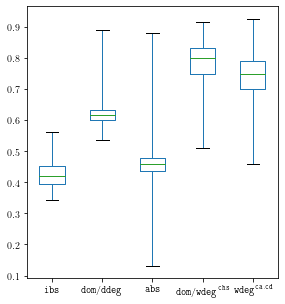

auvr


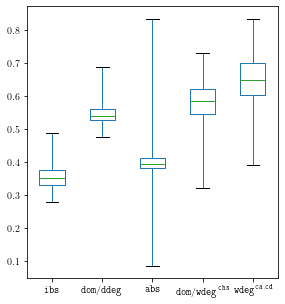

esb


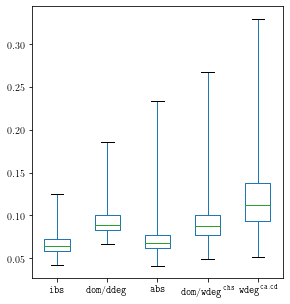

input experiment_ware    cpu_time  \
455    CostasArray-16          impact  2400.00000   
2885   CostasArray-16         domddeg     7.21448   
8555   CostasArray-16        activity   219.60700   
10175  CostasArray-16             chs     9.93102   
11795  CostasArray-16            cacd    26.86050   

                                                    npts  \
455    [0.9627329192546584, 0.9565217391304348, 0.962...   
2885   [0.9704968944099379, 0.968944099378882, 0.9704...   
8555   [0.9580745341614907, 0.9518633540372671, 0.961...   
10175  [0.968944099378882, 0.9642857142857143, 0.9627...   
11795  [0.9658385093167702, 0.9627329192546584, 0.964...   

                                                     esb       status  \
455    [0.049175637350312114, 0.12463480500854966, 0....      UNKNOWN   
2885   [0.2190551118332085, 0.1953734781215103, 0.222...  SATISFIABLE   
8555   [0.09902491356843672, 0.11474315381739493, 0.1...  SATISFIABLE   
10175  [0.1763126509877044, 0.2190551118332085, 0.182...  SATISFIABLE   
11795  [0.14752691205093635, 0.12682138053501546, 0.1...  SATISFIABLE   

                                                    auvr exception  timeout  \
455    [0.9373631840796008, 0.943034825870651, 0.9444...      None   2400.0   
2885   [0.9425870646766167, 0.9415920398010013, 0.941...      None   2400.0   
8555   [0.9373631840796012, 0.9288059701492599, 0.934...      None   2400.0   
10175  [0.9403482587064677, 0.9363184079602036, 0.932...      None   2400.0   
11795  [0.9425373134328358, 0.9346268656716448, 0.937...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
455      False         False    False           True              True  False  
2885      True          True    False           True              True  False  
8555      True          True    False           True              True  False  
10175     True          True    False           True              True  False  
11795     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 18
npts


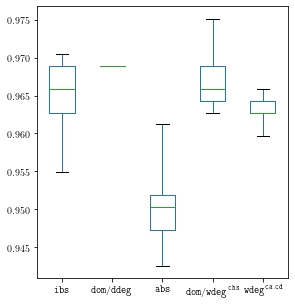

auvr


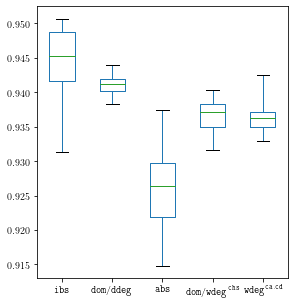

esb


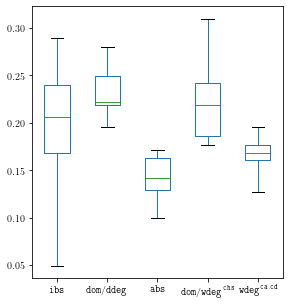

input experiment_ware    cpu_time  \
511    CoveringArray-elt-3-09-2-12          impact    15.16660   
2941   CoveringArray-elt-3-09-2-12         domddeg  2400.00000   
8611   CoveringArray-elt-3-09-2-12        activity  2400.00000   
10231  CoveringArray-elt-3-09-2-12             chs     6.58258   
11851  CoveringArray-elt-3-09-2-12            cacd  2400.00000   

                                                    npts  \
511    [0.9701877070298123, 0.9479205005520795, 0.951...   
2941   [0.9804931910195068, 0.9804931910195068, 0.981...   
8611   [0.9714758925285241, 0.9755244755244755, 0.970...   
10231  [0.9757085020242915, 0.9913507545086493, 0.982...   
11851  [0.9808612440191388, 0.9959514170040485, 0.995...   

                                                     esb       status  \
511    [0.006787623183564207, 0.007601281483171273, 0...  SATISFIABLE   
2941   [0.061261175343185426, 0.05691983220862898, 0....      UNKNOWN   
8611   [0.034098201370263585, 0.049853922003419864, 0...      UNKNOWN   
10231  [0.041072833468726595, 0.1185052244343587, 0.0...  SATISFIABLE   
11851  [0.06454302402228465, 0.10630615721317471, 0.1...      UNKNOWN   

                                                    auvr exception  timeout  \
511    [0.9147063492063497, 0.8866349206349214, 0.924...      None   2400.0   
2941   [0.9773571428571415, 0.977515873015863, 0.9776...      None   2400.0   
8611   [0.9661785714285708, 0.9724087301587324, 0.967...      None   2400.0   
10231  [0.9752341269841268, 0.9889880952380965, 0.979...      None   2400.0   
11851  [0.9787579365079366, 0.9898968253968305, 0.990...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
511       True          True    False           True              True  False  
2941     False         False    False           True              True  False  
8611     False         False    False           True              True  False  
10231     True          True    False           True              True  False  
11851    False         False    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 12
npts


auvr


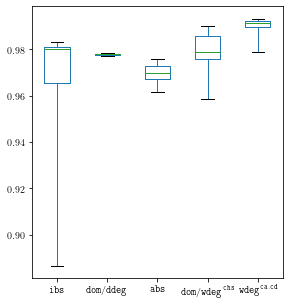

esb


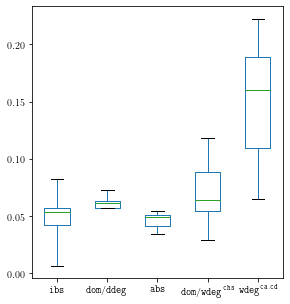

input experiment_ware   cpu_time  \
271    Eternity-10-05_c18          impact  2400.0000   
2701   Eternity-10-05_c18         domddeg   230.4650   
8371   Eternity-10-05_c18        activity   201.3600   
9991   Eternity-10-05_c18             chs    40.8485   
11611  Eternity-10-05_c18            cacd    49.0283   

                                                    npts  \
271    [0.881203007518797, 0.956390977443609, 0.95037...   
2701   [0.8736842105263158, 0.8902255639097745, 0.899...   
8371   [0.8827067669172932, 0.9338345864661655, 0.920...   
9991   [0.8887218045112782, 0.8601503759398497, 0.870...   
11611  [0.8887218045112782, 0.956390977443609, 0.9654...   

                                                     esb       status  \
271    [0.06454302402228465, 0.09267716269866513, 0.1...      UNKNOWN   
2701   [0.05829692492335387, 0.06631943752748515, 0.0...  SATISFIABLE   
8371   [0.0881563254938522, 0.08032020767217644, 0.07...  SATISFIABLE   
9991   [0.06454302402228465, 0.05691983220862898, 0.0...  SATISFIABLE   
11611  [0.08308987000569977, 0.1185052244343587, 0.14...  SATISFIABLE   

                                                    auvr exception  timeout  \
271    [0.8966464646464648, 0.9203232323232319, 0.886...      None   2400.0   
2701   [0.8487676767676766, 0.8567676767676778, 0.857...      None   2400.0   
8371   [0.8595555555555546, 0.8894545454545454, 0.880...      None   2400.0   
9991   [0.8922020202020199, 0.8654141414141457, 0.875...      None   2400.0   
11611  [0.9, 0.9147070707070698, 0.9324444444444534, ...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
271      False         False    False           True              True  False  
2701      True          True    False           True              True  False  
8371      True          True    False           True              True  False  
9991      True          True    False           True              True  False  
11611     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 219
npts


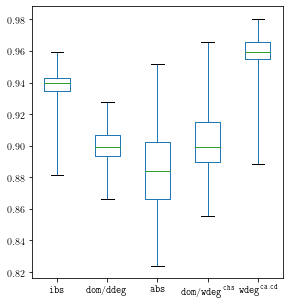

auvr


esb


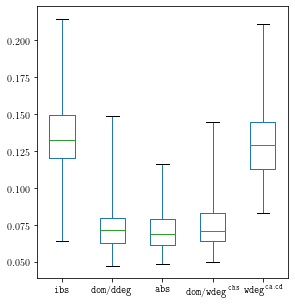

input experiment_ware   cpu_time  \
620    GracefulGraph-K05-P02_c18          impact  333.35800   
3050   GracefulGraph-K05-P02_c18         domddeg    9.43634   
8720   GracefulGraph-K05-P02_c18        activity   27.52000   
10340  GracefulGraph-K05-P02_c18             chs   23.44650   
11960  GracefulGraph-K05-P02_c18            cacd   98.98870   

                                                    npts  \
620    [0.8841463414634146, 0.774390243902439, 0.8353...   
3050   [0.9024390243902439, 0.8963414634146342, 0.914...   
8720   [0.8353658536585366, 0.9024390243902439, 0.920...   
10340  [0.8841463414634146, 0.9024390243902439, 0.896...   
11960  [0.8902439024390244, 0.8963414634146342, 0.896...   

                                                     esb       status  \
620    [0.15380465298927407, 0.1390157440479977, 0.12...  SATISFIABLE   
3050   [0.3012007787706617, 0.3012007787706617, 0.283...  SATISFIABLE   
8720   [0.1290860480445693, 0.15380465298927407, 0.19...  SATISFIABLE   
10340  [0.19023207080252316, 0.24926961001709932, 0.2...  SATISFIABLE   
11960  [0.16811206256967165, 0.16811206256967165, 0.1...  SATISFIABLE   

                                                    auvr exception  timeout  \
620    [0.8291428571428546, 0.7060952380952363, 0.740...      None   2400.0   
3050   [0.8529523809523811, 0.8415238095238083, 0.842...      None   2400.0   
8720   [0.765714285714287, 0.8325714285714299, 0.7639...      None   2400.0   
10340  [0.806857142857141, 0.8500952380952391, 0.8183...      None   2400.0   
11960  [0.83790476190476, 0.8428571428571416, 0.83047...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
620       True          True    False           True              True  False  
3050      True          True    False           True              True  False  
8720      True          True    False           True              True  False  
10340     True          True    False           True              True  False  
11960     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 155
npts


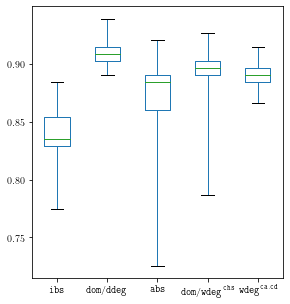

auvr


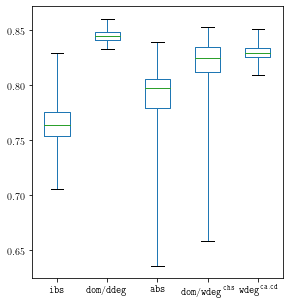

esb


input experiment_ware   cpu_time  \
745    KnightTour-14-ext03          impact  2400.0000   
3175   KnightTour-14-ext03         domddeg  2400.0000   
8845   KnightTour-14-ext03        activity   126.9000   
10465  KnightTour-14-ext03             chs  2400.0000   
12085  KnightTour-14-ext03            cacd    10.1794   

                                                    npts  \
745    [0.6939048894842599, 0.8620227729403884, 0.935...   
3175   [0.5867381111855325, 0.36771600803750837, 0.36...   
8845   [0.607501674480911, 0.4246483590087073, 0.4085...   
10465  [0.6945746818486269, 0.6784996651038178, 0.368...   
12085  [0.6945746818486269, 0.9651707970529136, 0.943...   

                                                     esb       status  \
745    [0.007414173015893211, 0.01374300131272981, 0....      UNKNOWN   
3175   [0.00730183706110695, 0.00713605003997619, 0.0...      UNKNOWN   
8845   [0.007243305301098076, 0.007353833866221649, 0...  SATISFIABLE   
10465  [0.00730183706110695, 0.007080135837899981, 0....      UNKNOWN   
12085  [0.009486638701438163, 0.018254592652767375, 0...  SATISFIABLE   

                                                    auvr exception  timeout  \
745    [0.3694557823129258, 0.818775510204076, 0.8926...      None   2400.0   
3175   [0.34374149659863984, 0.342278911564626, 0.340...      None   2400.0   
8845   [0.3453741496598641, 0.3696938775510216, 0.346...      None   2400.0   
10465  [0.3484013605442179, 0.3551700680272107, 0.348...      None   2400.0   
12085  [0.4886054421768711, 0.7960884353741465, 0.814...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
745      False         False    False           True              True  False  
3175     False         False    False           True              True  False  
8845      True          True    False           True              True  False  
10465    False         False    False           True              True  False  
12085     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 12
npts


auvr


esb


input experiment_ware  cpu_time  \
650    NumberPartitioning-188          impact  1705.120   
3080   NumberPartitioning-188         domddeg  2400.000   
8750   NumberPartitioning-188        activity   182.129   
10370  NumberPartitioning-188             chs  2400.000   
11990  NumberPartitioning-188            cacd   398.268   

                                                    npts  \
650    [0.9197371509035438, 0.8352499413283266, 0.992...   
3080   [0.8603614175076273, 0.8601267308143629, 0.860...   
8750   [0.7298756160525698, 0.46209809903778454, 0.94...   
10370  [0.9199718375968082, 0.999530626613471, 0.9985...   
11990  [0.9202065242900728, 0.9978878197606196, 0.999...   

                                                     esb       status  \
650    [0.005796967674816264, 0.004734000452191146, 0...  SATISFIABLE   
3080   [0.011659384984670776, 0.011948460645447736, 0...      UNKNOWN   
8750   [0.006054287010465562, 0.0030866006364201025, ...  SATISFIABLE   
10370  [0.016772201138041485, 0.10630615721317471, 0....      UNKNOWN   
11990  [0.017376968005999714, 0.09511603540126158, 0....  SATISFIABLE   

                                                    auvr exception  timeout  \
650    [0.7480496453900699, 0.7483687943262427, 0.989...      None   2400.0   
3080   [0.7826773049645416, 0.7821276595744746, 0.781...      None   2400.0   
8750   [0.5857801418439708, 0.5866843971631183, 0.946...      None   2400.0   
10370  [0.8685638297872331, 0.9928900709219888, 0.990...      None   2400.0   
11990  [0.8745035460992912, 0.9953191489361735, 0.992...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
650       True          True    False           True              True  False  
3080     False         False    False           True              True  False  
8750      True          True    False           True              True  False  
10370    False         False    False           True              True  False  
11990     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 33
npts


auvr


esb


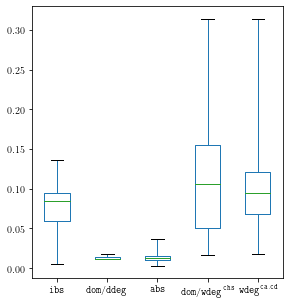

input experiment_ware   cpu_time  \
807    Pb-robin12_c18          impact  2400.0000   
3237   Pb-robin12_c18         domddeg  2400.0000   
8907   Pb-robin12_c18        activity  2400.0000   
10527  Pb-robin12_c18             chs   139.9440   
12147  Pb-robin12_c18            cacd    98.1211   

                                                    npts  \
807    [0.895340830846913, 0.8134037181546936, 0.8905...   
3237   [0.895340830846913, 0.8804223089281615, 0.8804...   
8907   [0.895340830846913, 0.9327518935047051, 0.4278...   
10527  [0.895340830846913, 0.8221253155841175, 0.9586...   
12147  [0.895340830846913, 0.6993344044067018, 0.7858...   

                                                     esb       status  \
807    [0.013588005057323084, 0.007585329161065982, 0...      UNKNOWN   
3237   [0.013588005057323084, 0.01348660203450724, 0....      UNKNOWN   
8907   [0.010936185613458216, 0.006136518412984618, 0...      UNKNOWN   
10527  [0.01341153745917603, 0.007900348295623912, 0....  SATISFIABLE   
12147  [0.01307200486527284, 0.005513973066739802, 0....  SATISFIABLE   

                                                    auvr exception  timeout  \
807    [0.8786501377410466, 0.7857315580042843, 0.800...      None   2400.0   
3237   [0.8786501377410466, 0.8776997245179088, 0.877...      None   2400.0   
8907   [0.8509397000306094, 0.7512809917355388, 0.406...      None   2400.0   
10527  [0.8779690847872664, 0.7915656565656586, 0.831...      None   2400.0   
12147  [0.8772252831343738, 0.6868778696051436, 0.758...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
807      False         False    False           True              True  False  
3237     False         False    False           True              True  False  
8907     False         False    False           True              True  False  
10527     True          True    False           True              True  False  
12147     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 125
npts


auvr


esb


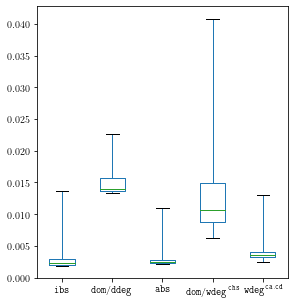

input experiment_ware    cpu_time  \
404    QueenAttacking-07_X2          impact  2400.00000   
2834   QueenAttacking-07_X2         domddeg  2400.00000   
8504   QueenAttacking-07_X2        activity  2400.00000   
10124  QueenAttacking-07_X2             chs    33.10410   
11744  QueenAttacking-07_X2            cacd     9.10493   

                                                    npts  \
404    [0.956989247311828, 0.899641577060932, 0.83870...   
2834   [0.7275985663082437, 0.7132616487455197, 0.727...   
8504   [0.7060931899641577, 0.7992831541218638, 0.745...   
10124  [0.974910394265233, 0.899641577060932, 0.80645...   
11744  [0.974910394265233, 0.9032258064516129, 0.9211...   

                                                     esb       status  \
404    [0.04328633946404719, 0.08032020767217644, 0.1...      UNKNOWN   
2834   [0.09388076221423221, 0.06512449270717009, 0.0...      UNKNOWN   
8504   [0.05691983220862898, 0.061261175343185426, 0....      UNKNOWN   
10124  [0.0881563254938522, 0.09902491356843672, 0.09...  SATISFIABLE   
11744  [0.0881563254938522, 0.09150403405690988, 0.10...  SATISFIABLE   

                                                    auvr exception  timeout  \
404    [0.8698666666666671, 0.7586666666666683, 0.772...      None   2400.0   
2834   [0.6125333333333333, 0.6305333333333305, 0.625...      None   2400.0   
8504   [0.6032000000000001, 0.65533333333333, 0.62126...      None   2400.0   
10124  [0.7737333333333345, 0.7330666666666646, 0.723...      None   2400.0   
11744  [0.7855999999999995, 0.7818666666666685, 0.801...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
404      False         False    False           True              True  False  
2834     False         False    False           True              True  False  
8504     False         False    False           True              True  False  
10124     True          True    False           True              True  False  
11744     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 121
npts


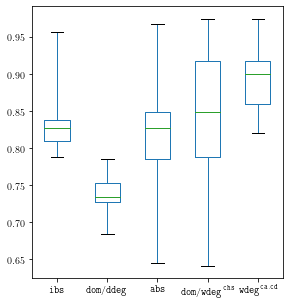

auvr


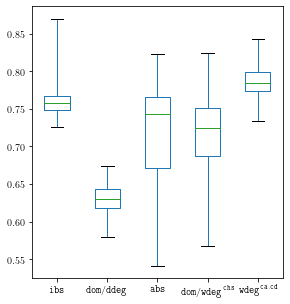

esb


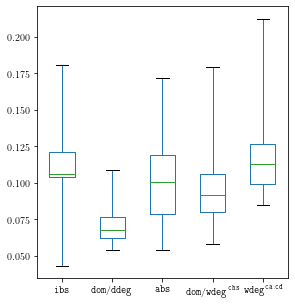

input experiment_ware   cpu_time  \
370    StripPacking-C1P3_c18          impact  2400.0000   
2800   StripPacking-C1P3_c18         domddeg  2400.0000   
8470   StripPacking-C1P3_c18        activity  2400.0000   
10090  StripPacking-C1P3_c18             chs    15.5712   
11710  StripPacking-C1P3_c18            cacd   155.6050   

                                                    npts  \
370    [0.580110497237569, 0.6353591160220995, 0.6077...   
2800   [0.6740331491712708, 0.56353591160221, 0.58563...   
8470   [0.6353591160220995, 0.4696132596685083, 0.795...   
10090  [0.6685082872928176, 0.7237569060773481, 0.640...   
11710  [0.6850828729281768, 0.8011049723756906, 0.762...   

                                                     esb       status  \
370    [0.05394640813802896, 0.06631943752748515, 0.0...      UNKNOWN   
2800   [0.06950787202399886, 0.07530019469266543, 0.0...      UNKNOWN   
8470   [0.056037354189890545, 0.050907173876731555, 0...      UNKNOWN   
10090  [0.10630615721317471, 0.0708707714754498, 0.10...  SATISFIABLE   
11710  [0.09638424920661173, 0.1445763738099176, 0.06...  SATISFIABLE   

                                                    auvr exception  timeout  \
370    [0.6916666666666672, 0.6885833333333318, 0.725...      None   2400.0   
2800   [0.6188333333333319, 0.6214166666666667, 0.626...      None   2400.0   
8470   [0.552083333333334, 0.5054999999999998, 0.5625...      None   2400.0   
10090  [0.7749999999999996, 0.6658333333333313, 0.659...      None   2400.0   
11710  [0.7957499999999998, 0.8039999999999979, 0.616...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
370      False         False    False           True              True  False  
2800     False         False    False           True              True  False  
8470     False         False    False           True              True  False  
10090     True          True    False           True              True  False  
11710     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 120
npts


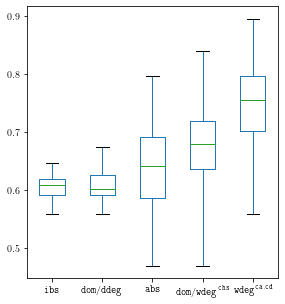

auvr


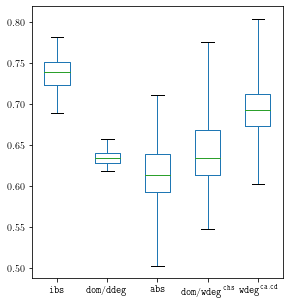

esb


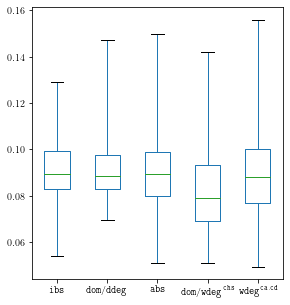

input experiment_ware   cpu_time  \
588    Subisomorphism-g17-g42_c18          impact  2400.0000   
3018   Subisomorphism-g17-g42_c18         domddeg    87.4521   
8688   Subisomorphism-g17-g42_c18        activity  2400.0000   
10308  Subisomorphism-g17-g42_c18             chs    38.9350   
11928  Subisomorphism-g17-g42_c18            cacd    62.4749   

                                                    npts  \
588    [0.9086859688195991, 0.9732739420935412, 0.942...   
3018   [0.9576837416481069, 0.9688195991091314, 0.971...   
8688   [0.9532293986636972, 0.9532293986636972, 0.973...   
10308  [0.955456570155902, 0.9576837416481069, 0.9576...   
11928  [0.9443207126948775, 0.9710467706013363, 0.975...   

                                                     esb         status  \
588    [0.0180720467262397, 0.041072833468726595, 0.1...        UNKNOWN   
3018   [0.20080051918044112, 0.24926961001709932, 0.2...  UNSATISFIABLE   
8688   [0.20080051918044112, 0.12682138053501546, 0.2...        UNKNOWN   
10308  [0.12682138053501546, 0.16811206256967165, 0.1...  UNSATISFIABLE   
11928  [0.1445763738099176, 0.16811206256967165, 0.14...  UNSATISFIABLE   

                                                    auvr exception  timeout  \
588    [0.881875, 0.9163541666666667, 0.9141666666666...      None   2400.0   
3018   [0.9198958333333334, 0.9157291666666667, 0.923...      None   2400.0   
8688   [0.9064583333333334, 0.8833333333333333, 0.928...      None   2400.0   
10308  [0.9109375, 0.9228125, 0.9102604166666667, 0.9...      None   2400.0   
11928  [0.9175, 0.9346875, 0.9414583333333333, 0.9430...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
588      False         False    False           True              True  False  
3018      True          True    False           True              True  False  
8688     False         False    False           True              True  False  
10308     True          True    False           True              True  False  
11928     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 99
npts


auvr


esb


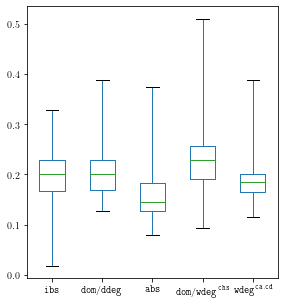

input experiment_ware  cpu_time  \
237    frb-59-26-3-mgd_c18          impact   2400.00   
2667   frb-59-26-3-mgd_c18         domddeg   1982.18   
8337   frb-59-26-3-mgd_c18        activity   2400.00   
9957   frb-59-26-3-mgd_c18             chs   2400.00   
11577  frb-59-26-3-mgd_c18            cacd   2400.00   

                                                    npts  \
237    [0.8633093525179856, 0.8309352517985612, 0.848...   
2667   [0.8489208633093526, 0.8489208633093526, 0.841...   
8337   [0.8633093525179856, 0.8345323741007195, 0.848...   
9957   [0.8848920863309353, 0.8525179856115108, 0.888...   
11577  [0.8812949640287769, 0.9028776978417267, 0.906...   

                                                     esb       status  \
237    [0.04951245678421836, 0.10181434775346311, 0.1...      UNKNOWN   
2667   [0.10952755591660425, 0.11659384984670774, 0.1...  SATISFIABLE   
8337   [0.10181434775346311, 0.10952755591660425, 0.1...      UNKNOWN   
9957   [0.11659384984670774, 0.12682138053501546, 0.1...      UNKNOWN   
11577  [0.09036023363119851, 0.11659384984670774, 0.1...      UNKNOWN   

                                                    auvr exception  timeout  \
237    [0.7933333333333337, 0.7801129943502796, 0.807...      None   2400.0   
2667   [0.776384180790961, 0.7777401129943484, 0.7698...      None   2400.0   
8337   [0.7882485875706216, 0.7748022598870029, 0.773...      None   2400.0   
9957   [0.8210169491525429, 0.7885875706214668, 0.814...      None   2400.0   
11577  [0.8266666666666675, 0.8569491525423689, 0.857...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
237      False         False    False           True              True  False  
2667      True          True    False           True              True  False  
8337     False         False    False           True              True  False  
9957     False         False    False           True              True  False  
11577    False         False    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 12922
npts


auvr


esb


input experiment_ware    cpu_time  \
18     qwh-o30-h375-17          impact  2400.00000   
2448   qwh-o30-h375-17         domddeg   101.10400   
8118   qwh-o30-h375-17        activity    47.05470   
9738   qwh-o30-h375-17             chs     5.90027   
11358  qwh-o30-h375-17            cacd    31.89720   

                                                    npts  \
18     [0.9621915327145121, 0.9723794430609011, 0.965...   
2448   [0.9422685080371292, 0.9309486076522526, 0.935...   
8118   [0.9411365179986416, 0.9481548562372651, 0.982...   
9738   [0.9633235227529998, 0.9501924383065429, 0.954...   
11358  [0.9644555127914874, 0.9683042789223455, 0.970...   

                                                     esb       status  \
18     [0.034259804220359624, 0.04884336953037757, 0....      UNKNOWN   
2448   [0.01938021096647689, 0.01959029455418938, 0.0...  SATISFIABLE   
8118   [0.02071294753723748, 0.024926961001709932, 0....  SATISFIABLE   
9738   [0.034259804220359624, 0.02628661341998502, 0....  SATISFIABLE   
11358  [0.03669451111926843, 0.04462233759565358, 0.0...  SATISFIABLE   

                                                    auvr exception  timeout  \
18     [0.9567851851851844, 0.9682518518518536, 0.958...      None   2400.0   
2448   [0.9222296296296304, 0.923000000000001, 0.9256...      None   2400.0   
8118   [0.9343333333333331, 0.9417407407407397, 0.937...      None   2400.0   
9738   [0.9581777777777776, 0.94414814814815, 0.94688...      None   2400.0   
11358  [0.958799999999999, 0.9609851851851838, 0.9638...      None   2400.0   

       success  user_success  missing  consistent_xp  consistent_input  error  
18       False         False    False           True              True  False  
2448      True          True    False           True              True  False  
8118      True          True    False           True              True  False  
9738      True          True    False           True              True  False  
11358     True          True    False           True              True  False

Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) : 9
npts


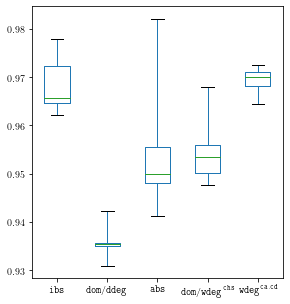

auvr


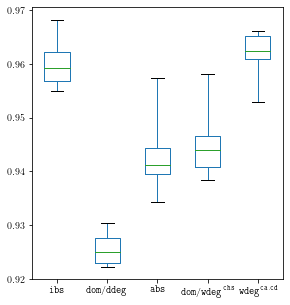

esb


In [5]:
def f(rewards):
    t = [x for x in rewards if x > 0 and x < 1]
    return t

for sub in analysis.groupby('input'):
    df = sub.data_frame
        
        
    npts = {
       row.experiment_ware: f(row.npts) for row in df.itertuples()
    }
    
    auvr = {
       row.experiment_ware: f(row.auvr) for row in df.itertuples()
    }
    
    esb = {
       row.experiment_ware: f(row.esb) for row in df.itertuples()
    }
    
    min_size = min([len(v) for k, v in npts.items()]) - 1
    
    if min_size == 0:
        continue
    
    npts = {
       k: v[0:min_size] for k, v in npts.items()
    }
    
    auvr = {
       k: v[0:min_size] for k, v in auvr.items()
    }
    
    esb = {
       k: v[0:min_size] for k, v in esb.items()
    }
    
    # Display
    size = (4.5,5)
    
    display(sub.data_frame)
    print('Nombre de runs (égal au nombre minimum de runs nécessaires pour la meilleure stratégie) :', min_size)
    print('npts')
    pd.DataFrame(npts).rename(columns=MAP_NAME).plot.box(figsize=size, whis=1e10, showfliers=False)
    plt.savefig(f'fig/1A-{sub.inputs[0]}_npts.pdf', transparent=True, bbox_inches='tight')
    plt.show()
    
    print('auvr')
    pd.DataFrame(auvr).rename(columns=MAP_NAME).plot.box(figsize=size, whis=1e10, showfliers=False)
    plt.savefig(f'fig/1A-{sub.inputs[0]}_auvr.pdf', transparent=True, bbox_inches='tight')
    plt.show()
    
    print('esb')
    pd.DataFrame(esb).rename(columns=MAP_NAME).plot.box(figsize=size, whis=1e10, showfliers=False)
    plt.savefig(f'fig/1A-{sub.inputs[0]}_esb.pdf', transparent=True, bbox_inches='tight')
    plt.show()
